<div style="text-align: right">B"H</div>

# Predicting Alcohol level in Wines

> ### *Moshe Rosenstock*



## 1) Introduction:


- In this study, I used several machine learning algorithms to predict the level of alcohol in wines, based on its other attributes. I was interested in this problem because I wanted to know if it is possible to predict the alcohol level in a wine without actually measuring it, but rather by using the other factors that may influence its alcohol content. I divided the dataset into training and testing sets, and used kmeans clustering, hierarchical clustering, regression trees, and the Random Forest algorithm to make predictions on the test set.

- After calculating the different results of each of the algorithms, I will evaluated the performance  using mean absolute error and R^2. I will then compare the results of these metrics for each algorithm to determine which one was the best at predicting the alcohol level in wines.


In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import math
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from plotly import tools
from plotly.subplots import make_subplots
from sklearn.metrics import mean_absolute_error
import plotly.offline as py
from sklearn.preprocessing import MinMaxScaler

## 2) Data:
- The dataset I utilized is based on a chemical analysis of wines grown in Italy. The study determined the amount of more than ten constituents found in each of the different types of wines.

- It was interesting to analyze this data as we could figure out a nice partitioning/classification of the level of alcohol in a wine using the other constituents found in the wine. The columns of this dataset are composed by the different components of wines, these includes Alcohol, Malic Acid, Ash, Ash_Alcanity, Magnesium, Total_Phenols, among others. On the other hand, each of the 178 rows represents a different wine, which all come from Italy's same region.

- These features give us a lot of space to make exciting classifications. One example to understand how our dataset works: it can show which component has the most significant correlation with the percentage of alcohol the wine has. 

- This work is essential because it can help winemakers to understand the factors that affect the alcohol level in their wines and to make more accurate predictions about the alcohol content of their wines. By using machine learning algorithms, winemakers can better understand the relationships between the attributes and can make more informed decisions about how to produce with the desired alcohol level. By predicting the alcohol level in a wine based on its other features, we can improve the accuracy and efficiency of the wine production process and ultimately produce better wines. Additionally, this work has broader implications for the wine industry, as it can help winemakers optimize their production processes and create high-quality wines tailored to their customer's preferences.
> This dataset was imported from Machine Learning Repository   
> https://archive.ics.uci.edu/ml/datasets/wine 


In [2]:
# Import Data
df = pd.read_csv("wine-clustering.csv")



In [3]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
# Scale all the columns to be between 0-1
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [5]:
df.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


## 3) Methodology: 
- In  this study, I used several machine learning algorithms to predict the level of alcohol in a wine based on its other attributes. I used clustering, hierarchical clustering, regression trees, and the Random Forest algorithm to make predictions on the test set.
Clustering is an unsupervised learning technique that is used to group similar data points into clusters. I used this algorithm to identify patterns or groupings in the data that may not be immediately apparent. And try to use these patterns to predict on the Test data.
Hierarchical clustering is a specific type of clustering algorithm that constructs a hierarchy of clusters by successively merging or splitting sets based on their similarity. I used this algorithm to further analyze the data patterns and to better understand the relationships between the different attributes. Although I know both cluster methods won't do as well as the regression methods, I still want to see how they react to this kind of task.
Regression trees are a supervised learning algorithm used for regression tasks, where the goal is to predict a continuous target variable based on a set of input features. I used regression trees to make predictions mainly because of their ability to subdivide data into many ranges, thus creating many leaves for the tree.
Lastly, I used the Random Forest algorithm, which is an ensemble learning method that combines multiple decision trees to make predictions. I chose this algorithm because it is typically more accurate and robust than a single decision tree, and it can handle high-dimensional data and large numbers of features more effectively. Most importantly, it is excellent at not overfitting, as each decision tree is trained on a different subset of the data.
After conducting all of these methods with my data, I will use three different scores to compare the algorithms' results. Even though regression and clustering algorithms cannot be ideally compared, I will still conduct the MSE, MAE, and R^2 to all the different algorithms. I will also conduct the silhouette score to both clustering methods, Kmeans and hierarchical, to see which of them is better with this data.






## 4) Analysis:

In [6]:
# creating a two dimentional matrix

# Splitting my data into training and testing sets

# We are dropping the 'smoker' column because I will use it for the Y_sample and test
X=df.drop('Alcohol',axis='columns').values
Y= df['Alcohol'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)


(178, 12) (142, 12) (36, 12)


**Perform the Elbow Method to find optimal number of Clusters (We are going to do it with 2 different visualizations)**

Visualization #1 of Elbow Method


/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/a

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



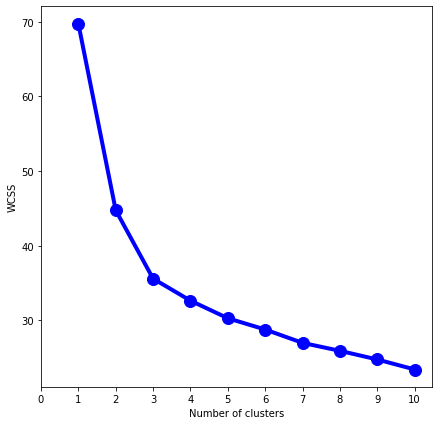

In [7]:

print("Visualization #1 of Elbow Method")
WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(X_train)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'b')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [8]:
# create a KMeans model with 2 clusters. The reason Why I used two clusters, is because 2 gave me a better 
# result using the mse,mae, and r^2 compared to using three clusters.
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_train, Y_train)

/Users/mosherosenstock/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [9]:
# Here I will messure the score of the clustering algorithm I just did


p = kmeans.predict(X_test)

sil = silhouette_score(X_test, p)
mse1 = mean_squared_error(Y_test, p)
mae1 = mean_absolute_error(Y_test, p)
r1 = r2_score(Y_test, p)

print('- The silhouette score is ', sil )
print('- The R^2 is = ', r1)
print('- The mean absolute error is', mae1)
print('- The Mean Square Error =', mse1)

- The silhouette score is  0.3430891022275936
- The R^2 is =  -3.377263268087373
- The mean absolute error is 0.41527777777777763
- The Mean Square Error = 0.22021910587873184


#### Hierarchial Clustering- (Different clustering algorithm)

In [10]:

# create a hierarchical clustering model with 2 clusters
#  (The reason why I used 2 cluster, instead of 3, is because when I use 3 in this type of clustering, 
# I end up with a higher level of error.)
hc = AgglomerativeClustering(n_clusters=2)


hc.fit(X_train, Y_train)

p2 = hc.fit_predict(X_test)

sil2 = silhouette_score(X_test, p)
mse2 = mean_squared_error(Y_test, p2)
mae2 = mean_absolute_error(Y_test, p2)
r2 = r2_score(Y_test, p2)


print('- The silhouette score is =', sil2 )
print('- The R^2 = ', r2)
print('- The mean absolute error is =', mae2)
print('- The Mean Square Error =',mse2)

- The silhouette score is = 0.3430891022275936
- The R^2 =  -6.036228539904719
- The mean absolute error is = 0.5490497076023392
- The Mean Square Error = 0.3539910357032934


## Regression Trees

In [11]:

dt = DecisionTreeRegressor()


dt.fit(X_train, Y_train)

# making the predictions on the test
p3 = dt.predict(X_test)

mse3 = mean_squared_error(Y_test, p3)
mae3 = mean_absolute_error(Y_test, p3)
r3 = r2_score(Y_test, p3)

print('- The R^2 =', r3)
print('- The mean absolute error is =', mae3)
print('- The mean squared error is =' , mse3)

- The R^2 = 0.36147361719605287
- The mean absolute error is = 0.14342105263157887
- The mean squared error is = 0.03212411511234223


## Random Forest

In [12]:

p1 = RandomForestRegressor()
p1.fit(X_train, Y_train)
predictions = p1.predict(X_test)

mse4 = mean_squared_error(Y_test, predictions)
r4 = r2_score(Y_test, predictions)
mae4 = mean_absolute_error(Y_test, predictions)


print('- The R^2  = ', r4)
print('- The mean absolute error  =', mae4)
print('- The mean squared error  =', mse4)

- The R^2  =  0.6857172478524105
- The mean absolute error  = 0.09871637426900577
- The mean squared error  = 0.015811492805478597


**Plotting the R-Squared**

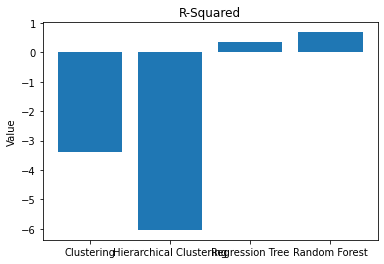

In [13]:
import matplotlib.pyplot as plt

r = [r1, r2,r3,r4]
names = ['Clustering', 'Hierarchical Clustering',  'Regression Tree', 'Random Forest']
# create the bar plot
plt.bar(range(len(r)), r)
plt.ylabel('Value')
plt.title('R-Squared')
plt.xticks(range(len(r)), names)
plt.show()

**Mean Absolute Error**

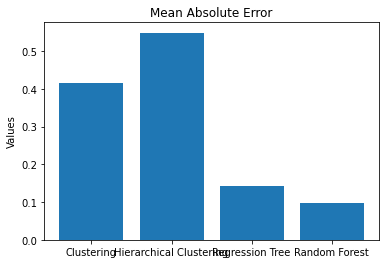

In [14]:
m = [mae1, mae2,mae3,mae4]
names = ['Clustering', 'Hierarchical Clustering',  'Regression Tree', 'Random Forest']
plt.bar(range(len(m)), m)
plt.ylabel('Values')
plt.title('Mean Absolute Error')
plt.xticks(range(len(m)), names)
plt.show()


**Mean Square Error**

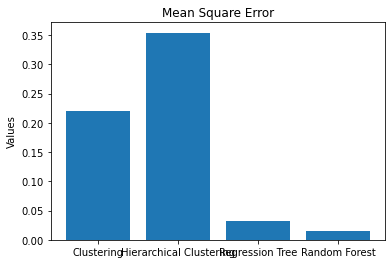

In [15]:
m = [mse1, mse2,mse3,mse4]
names = ['Clustering', 'Hierarchical Clustering',  'Regression Tree', 'Random Forest']
plt.bar(range(len(m)), m)

plt.ylabel('Values')
plt.title('Mean Square Error')
plt.xticks(range(len(m)), names)
plt.show()

## 5) Results: 

After evaluating and working with different algorithms, I was able to find the best method to predict the level of alcohol in wines by considering its other chemical components. Although all of the algorithms can indicate in some way or another the alcohol level, it is worth mentioning that non of these methods will have a perfect result at predicting the desired variable. To get the precise measurement of each respective wine, a hydrometer or other scientific methods should be used.
Putting that information aside, the algorithms can give us a good approximation of the alcohol level.

- **Clustering:** Altough there are more practicals ways to measure and predict the alcohol level, I used two different algorithms to see what the results would be. I conducted two different clustering algorithms: K-means and Hierarchial clusterin. One of the differences between both of these algorithms is that K-means uses clusters, while hierarchical doesn't. As long as the distances between points and cluster centers are similar for both algorithms, they may have the same silhouette coefficient even if the clusters themselves are different. Although these clustering algorithms are somewhat different, they both got the same silhouette score, 0.343.

- **Regression:** The best way to predict a continuous target variable based on a set of input features is by using a regression algorithm. Therefore, I used two of the most potent regression algorithms: Regression Tree and Random Forest. Although both of these methods achieved a very good R-squared value, Mean Square Error, and Mean Absolute Error, the Random Forest algorithm ended up being the most efficient one. It got an MSE of .016, an MAE of .01, and an R^2 of .68, and when compared to the other used algorithms, these are very good numbers. One reason why random forests are better than a single regression tree is that they can reduce overfitting. Overfitting occurs when a model has learned the details of the training data too well and cannot generalize well to new data. Decision trees are prone to overfitting because they can keep splitting the data into smaller and smaller subgroups, and this can lead to a model that is highly complex and not able to generalize well. Random forests, on the other hand, can prevent overfitting by aggregating the predictions of multiple decision trees; which provides a more robust model that can generalize better to new data.

## 6) Conclusion:  
To conclude, I divided my data into training and testing sets to prevent the overfitting of the models. Then, I used the training set to evaluate the performance of different algorithms in predicting the alcohol level of wines based on other attributes. After running each algorithm, I used various metrics to assess their performance. The results showed that the Random Forest algorithm was the most accurate, outperforming the other algorithms in the metric scores.
The ability to predict the alcohol level of a drink using other factors is valuable for several reasons. For example, it can help wine producers save time and money by reducing the need for hydrometer tests. It can also provide insights into the factors that influence the alcohol level of wines, allowing producers to optimize their production processes to achieve the desired alcohol level. Additionally, it can assist consumers in making informed decisions about the alcohol content of the wines they purchase. We can conclude that by using machine learning algorithms to predict the alcohol level of wines is a practical and valuable tool.

## 7) References:  


1. [Analizing the Results of Kmeans, Openclassrooms](https://openclassrooms.com/en/courses/5869986-perform-an-exploratory-data-analysis/6177861-analyze-the-results-of-a-k-means-clustering)

2. [Kaggle, Creator: Narendia. Used as a base to clean the data.](https://www.kaggle.com/code/naren3256/kmeans-clustering-and-cluster-visualization-in-3d/notebook )

4. [Guide on Kmeans Clustering](https://realpython.com/k-means-clustering-python/)  

5. [Plotly Algorithms to visualize data](https://plotly.com/python/v3/ipython-notebooks/baltimore-vital-signs/)  

6. [Plotly Algorithms to visualize data](https://plotly.com/python/ml-regression/)

7. [Mean Square Error, By: Jim Frost](https://statisticsbyjim.com/regression/mean-squared-error-mse/)

8. [How to calculate R squared, By Safa Mulani](https://www.digitalocean.com/community/tutorials/r-squared-in-r-programming)

9. [Imported from SK-Learn, AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

10. [Imported from SK-Learn, Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html)

11. [O’Reilly, Matplotlib Plots](oreilly.com/library/view/python-data-science/9781491912126/ch04.html)

12. [K-Means Clustering Algorithm, Towards Data Science](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1)


13. [Kaggle Dataset](https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering)

14. BU CDS DS 210 Lectures/Homeworks   

15. BU CDS DS 121 Lectures/Homeworks
